# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

## Solution of ordinary differential equations (ODEs)

In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

### Integration of ordinary differential equations (ODEs)

ODE is an equation containing derivatives in a single variable, e.g.: 

$$\frac{dy}{dx} = f(x,y).$$

Functions $y(x)$ and $f(x,y)$ can depend on other *independent* variables as well, but such additional variables would not influence solution of this equation,  and therefore can be ignored (they are just passed on as parameters to $y$ and $f$). 

### ODEs vs PDEs

Equations containing derivatives in more than one variable are called *partial differential equations* (PDEs) and will not be considered in this course due to lack of time. 

ODEs can, in principle, contain derivatives of any order, but we will be only considering ODEs with 
first derivatives. Why?


### ODEs with higher order derivatives = system of first order ODEs

ODEs of different order can be re-cast as a system of first order ODE. 

For example, a 2nd order ODE describing a damped harmonic oscillator: 

$$\ddot{x} + \eta\dot{x} + kx = 0;$$

can be represented as a system of two first order ODEs: 

$$\dot{x}=v\ \ \mathrm{and}\ \ \dot{v}=-\eta v -kx.$$

Thus, solution of ODEs with higher order derivatives is equivalent to solving a system of ODEs with first order derivatives. Such system is solved using the same methods as used for single ODEs with first derivatives. In fact, usually ODE solvers are set up to solve a system of ODEs.

### Integration of ordinary differential equations (ODEs)

ODEs are solved by reconstructing solution step by step. For example, if  after $i$-th step we have value of $y_i$ at $x_i$, taking integral of $y^\prime = f(x,y)$ over the interval $[x_i,x_{i+1}]$ gives:

$$
\int\limits_{x_i}^{x_{i+1}}\frac{dy}{dx}\,dx = y(x_{i+1})-y(x_i)=\int\limits_{x_i}^{x_{i+1}} f(x,y)\,dx.\ \ \ \rightarrow\ \ \ y_{i+1}= y_i + \int\limits_{x_i}^{x_{i+1}} f(x,y)\,dx,
$$

where  notation $y_i\equiv y(x_i)$ was adopted. 

Different ODE integration schemes choose different ways to compute the integral of $f(x)$ in the above equation. The order of accuracy in the evaluation of this integral then determines the order of accuracy of ODE integration. 


### 1st order integration scheme

$$y_{i+1}= y_i + \int\limits_{x_i}^{x_{i+1}} f(x,y)\,dx$$

Taylor expand $f(x,y)$ around $x_i$, with $x_{i+1}-x_i=h$ and $f_{i,j}\equiv f(x_i,y_j)$:

$$
y_{i+1}= y_i + f_{i,i}h + \frac{1}{2}f_{i,i}^\prime h^2 +\frac{1}{6}f_{i,i}^{\prime\prime} h^3 + \mathcal{O}(h^4).
$$

Truncate at the linear order of $h$: 

$$
y_{i+1}= y_i + f_{i,i}h + \mathcal{O}(h^2).
$$

This is the simplest example of *explicit* ODE integration scheme. The name explicit is because 
$y_{i+1}$ is expressed *explicitly* in terms of known quantities $y_i$ and $f(x_i,y_i)$. 


This is the ***forward Euler scheme*** because Leonhard Euler introduced it around 1770. It is also the simplest in the class of schemes called ***the Runge-Kutta (RK) schemes***, in honor of German mathematicians C. Runge and M. W. Kutta, who introduced and systematically explored this general class of methods in 1900.

Why is the forward Euler (aka RK1) scheme above called 1st order if truncation term above is $\mathcal{O}(h^2)$?

### Order of an ODE scheme 

$$
y_{i+1}= y_i + h\,f_{i,i} + \mathcal{O}(h^2).
$$

The 2nd order accuracy in this equation is *local*. If we integrate over $[a,b]$ with $N=(b-a)/h$ steps, the errors add up to 

$$
N\mathcal{O}(h^2) = \frac{b-a}{h}\,\mathcal{O}(h^2)=\mathcal{O}(h)
$$


In [2]:
def rk1(f, y_start, t_start, t_end, dt, *args):
    """
    1st order Runge-Kutta method (forward Euler) with constant step
    dy/dt = f(t,y)
    
    Parameters:
    --------------------------------------------------------------
    f - python function pointer
        f(t,y)
    y_start - float or vector for system
        y(t0)
    t_start - float or vector for system
        starting "time" t0
    t_end - float 
        time at which to stop integration
    dt    - float
        integration step
    args  - list 
            parameters to pass on to function f
            
    Returns:
    -------------------------------------------
    float numpy arrays of {ti}, {yi}
    """
    t, y = t_start, y_start; 
    tout = np.array(t); yout = np.array(y)
    while t < t_end:
        y += dt * f(t, y, *args)
        t += dt
        tout = np.vstack((tout,t)); yout = np.vstack((yout,y))
    return tout, yout


### Consider a test case: 

$y^\prime = -c y$. Exact solution is $y(x) = e^{-cx}.$

In [3]:
def f(x, y, c):    
    return  c * y 

def ysolution(x, c):
    return np.exp(c*x) 

c = -1.
# few steps of 1st order Euler scheme
xmin, xmax = 0., 10.; 
step1 = 0.1; 
args = [c]
xout1, yout1 = rk1(f, ysolution(xmin,c), xmin, xmax, step1, *args)

In [13]:
# set up y'=f(x), where y = e^(c*x)
def fq(x, y, dx, c):    
    return  dx * c * y 

# parameters of the quiver grid and the function range
Ng = 25
xmin, xmax = 0., 10.; 
dx = np.abs(xmax-xmin)/ Ng

ymin = np.minimum(1.2*ysolution(xmin,c), 1.2*ysolution(xmax,c));
ymax = np.maximum(1.2*ysolution(xmin,c), 1.2*ysolution(xmax,c));
ymin = -2.; ymax = 2.
yscale = 2.*(ymax-ymin)**0.75

# evenly spaced grids of x and y 
x = np.linspace(xmin, xmax, Ng)
y = np.linspace(ymin, ymax, Ng)

# generated 2d mesh using numpy's meshgrid
(X,Y) = np.meshgrid(x,y)

# parameters for quivers indicating local slope
u = dx * np.ones_like(X); v = fq(X, Y, dx, c)

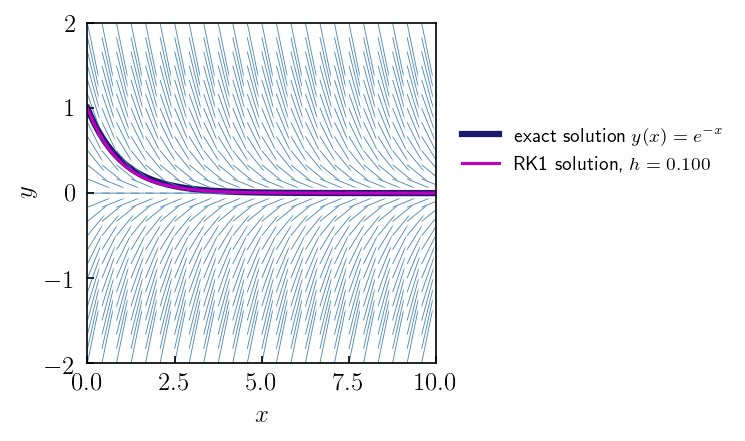

In [14]:
plot_pretty(dpi=150, fontsize=12)
# vector of x for plotting the function itself
xp = np.linspace(xmin, xmax, 100)

# plot
fsize=3.; fontsize=9
plt.figure(figsize=(fsize,fsize))
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.plot(xp, ysolution(xp,c), lw=3, c='midnightblue', zorder=0, label=r'exact solution $y(x)=e^{-x}$')#, label=r'$y(x)=e^{%.2fx}$'%c)
plt.plot(xout1, yout1, c='m', zorder=2, label=r'RK1 solution, $h=%.3f$'%step1)
plt.quiver(X, Y, u, v, angles='xy', headlength=0, headwidth=0, scale=yscale, color='steelblue', zorder=1)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(frameon=False, bbox_to_anchor=(1.025,0.75), fontsize=fontsize)

plt.show()

### Higher order schemes

To construct higher order schemes we need to maintain more truncation terms in expansion of $f(x,y)$. 
If we truncate the Taylor expansion retaining the next term, we get 

$$
y_{i+1}= y_i + h f_{i,i} + \frac{h^2}{2}f_{i,i}^\prime + \mathcal{O}(h^3).
$$

The difference with previous expansions we used is that derivatives in the equation above are full derivatives with respect to $x$, evaluated at $x_i, y_i$, i.e.:

$$
df(x,y)=\frac{\partial f}{\partial x}dx + \frac{\partial f}{\partial y}dy\ \ \ \ \rightarrow\ \ \ \ f^\prime_{i,i}\equiv \frac{df}{dx}(x_i,y_i)=\frac{\partial f_{i,i}}{\partial x} + f_{i,i}\frac{\partial f_{i,i}}{\partial y}.
$$

So that 

$$y_{i+1}= y_i + hf_{i,i} + \frac{h^2}{2}\left(\frac{\partial f_{i,i}}{\partial x} + f_{i,i}\frac{\partial f_{i,i}}{\partial y}\right)  + \mathcal{O}(h^3) = y_i + \frac{h}{2}f_{i,i} +  \frac{h}{2}\left(f_{i,i} + \frac{\partial f_{i,i}}{\partial x}h + \frac{\partial f_{i,i}}{\partial y}hf_{i,i}\right)  + \mathcal{O}(h^3). 
$$

The expression in brackets in the second part of the above equation consists of the first two orders of the Taylor expansion of 

$$f(x_i+h,y_i+hf_{i,i})= f_{i,i} +  \frac{\partial f_{i,i}}{\partial x}\,\Delta x +  \frac{\partial f_{i,i}}{\partial y}\, \Delta y + \mathcal{O}(h^2)=f_{i,i} + \frac{\partial f_{i,i}}{\partial x}\,h +  \frac{\partial f_{i,i}}{\partial y}\,hf_{i,i} + \mathcal{O}(h^2),$$

where $\Delta x = h$ and $\Delta y= y_{i+1}-y_i=hf_{i,i}$. Thus, we have

$$
y_{i+1}=  y_i + \frac{1}{2}\left[f(x_i,y_i) + f(x_i+h,y_i+hf(x_i,y_i))\right]\, h + \mathcal{O}(h^3). 
$$

or 

$$
y_{i+1}=  y_i + \frac{1}{2}\left[k_1 + k_2\right] + \mathcal{O}(h^3)=  y_i + \frac{h}{2}\left[s_1 + s_2\right] + \mathcal{O}(h^3). 
$$
where
$$
k_1 = h\, f(x_i,y_i);\ \ \ k_2 = hf(x_i+h,y_i+k_1).
$$
$$
s_1 = f(x_i,y_i);\ \ \ s_2 = f(x_i+h,y_i+k_1).
$$

This expression is known as the *classical 2nd order Runge-Kutta scheme* (RK2). 

### Higher order Runge-Kutta (RK) schemes: RK4

Are constructed in a similar way: either by using a higher order discretization of $dy/dx$ or by using a higher order quadrature scheme to evaluate $\int_{x_i}^{x_{i+1}} f(x,y)dx$. 

For example using the 4th order Simpson quadrature, which we obtain on the 1st Romberg iteration: 

$$R_{1,1}=\frac{1}{3}\,(4R_{1,0}-R_{0,0})=\frac{h}{6}\,(f_i + 4f_{i+1/2}+f_{i+1})$$ 

to evaluate the integral using mid-point of the interval, $x_{i+1/2}=x_i+h/2$, and points at its edges, $x_i$ and $x_{i+1}=x_i+h$ gives 

$$
y_{i+1}=  y_i + \frac{h}{6}\left[f(x_i,y_i) + 4f(x_{i+1/2},y_{i+1/2})+f(x_{i+1},y_{i+1})\right] + \mathcal{O}(h^5).
$$

However, we do not yet know $y_{i+1/2}$ and $y_{i+1}$, so these are estimated by extrapolations instead. In fact, to make these extrapolations as accurate as possible we can split the expression in brackets into four terms and use function evaluation in each previous term to estimate $y$ for computing $f$ in the next term. Namely,

$$
y_{i+1}=  y_i + \frac{h}{6}\left[f(x_i,y_i) + 2f(x_{i+1/2},y_{i+1/2})+ 2f(x_{i+1/2},y_{i+1/2})+f(x_{i+1},y_{i+1})\right] + \mathcal{O}(h^5)$$

or

$$
y_{i+1} = y_i + \frac{1}{6}\left[k_1 + 2k_2 + 2k_3 + k_4\right] + \mathcal{O}(h^5),
$$

where 

$$k_1=h\,f(x_i,y_i);\ \ \  k_2 = h\, f\left(x_{i+1/2},y_i+k_1/2\right);\ \ \ k_3=h\,f(x_{i+1/2},y_i+k_2/2);\ \ \ k_4=h\,f(x_{i+1},y_i+k_3).$$ 

This expression is known as the 4th order Runge-Kutta scheme (RK4). 

Expressions for even higher order schemes can be derived, but are progressively more complicated. 

In [6]:
def rk4(f, y_start, t_start, t_end, dt, *args):
    """
    4th order Runge-Kutta method with constant step
    dy/dt = f(t,y)
    
    Parameters:
    --------------------------------------------------------------
    f - python function pointer
        f(t,y)
    y_start - float or vector for system
        y(t0)
    t_start - float or vector for system
        starting "time" t0
    t_end - float 
        time at which to stop integration
    dt    - float
        integration step
    args  - list 
            parameters to pass on to function f
            
    Returns:
    -------------------------------------------
            list of [ti, yi]
    """
    t, y = t_start, y_start; 
    tout = np.array(t); yout = np.array(y)
    fact = 1./6.*dt
    while t < t_end:
        k1 = f(t, y, *args)
        k2 = f(t + 0.5*dt, y + 0.5*dt*k1, *args)
        k3 = f(t + 0.5*dt, y + 0.5*dt*k2, *args)
        k4 = f(t + dt,     y + dt*k3,     *args)
        y += fact * (k1 + 2.0*k2 + 2.0*k3 + k4)
        t += dt
        tout = np.vstack((tout,t)); yout = np.vstack((yout,y))
    return tout, yout


### Example: zombie apocalypse! 

Solving a system of ODEs describing development of zombie epidemic (<a href="https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html">example</a> taken from the <a href="https://scipy-cookbook.readthedocs.io/index.html">scipy cookbook</a> and based on the paper by <a href="http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf">Munz et al. 2009</a>) with the above routine: 

\begin{eqnarray}
\frac{dS}{dt} &=& P - BSZ - dS;\\
\frac{dZ}{dt} &=& BSZ + GR - ASZ;\\
\frac{dR}{dt} &=& dS + ASZ - GR
\end{eqnarray}

where: $S$ is the number of susceptible victims, $Z$: the number of zombies, $R$: the number of people "killed", $P$: the population birth rate, $d$: the chance of a natural death, 
$B$: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
$G$: the chance a dead person is resurrected into a zombie, $A$: the chance a zombie is totally destroyed.

In [15]:
# solve the system dy/dt = f(y, t)
def f_zombie_evo(t, y, *args):
    Si = y[0]; Zi = y[1]; Ri = y[2]
    # the model equations (see Munz et al. 2009)
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return np.array([f0, f1, f2])

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
ystart = [S0, Z0, R0]     # initial condition vector
tstart = 0; tend = 10. 
dt = (tend - tstart)/1000 
# birth rate, natural death percent (per day), transmission percent  (per day)
# resurrect percent (per day), destroy percent  (per day)
P, d, B, G, A = 0, 0.0001, 0.0095, 0.0001, 0.0001     # birth rate
args = [P, d, B, G, A]

tout, yout = rk4(f_zombie_evo, ystart, tstart, tend, dt, *args)

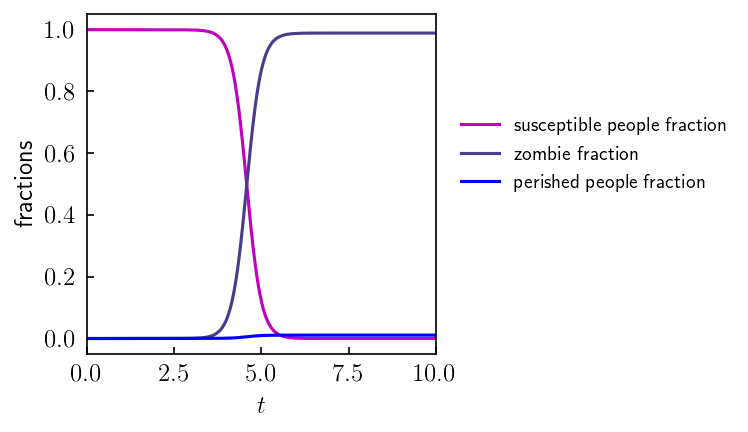

In [17]:
# plot
fsize=3.; fontsize=9.
plt.figure(figsize=(fsize,fsize))
ymin = 0.; ymax = 5.
plt.xlim(xmin, xmax); #plt.ylim(ymin, ymax)
plt.plot(tout, yout[:,0]/S0, c='m', zorder=2, label=r'susceptible people fraction')
plt.plot(tout, yout[:,1]/S0, c='darkslateblue', zorder=2, label=r'zombie fraction')
plt.plot(tout, yout[:,2]/S0, c='blue', zorder=2, label=r'perished people fraction')

plt.xlabel(r'$t$')
plt.ylabel(r'fractions')
plt.legend(frameon=False, bbox_to_anchor=(1.025,0.75), fontsize=fontsize)

plt.show()

### Trouble with constant step integration using explicit integration schemes

Consider a test case: $y^\prime = -c y$. Exact solution is $y(x) = e^{-cx}.$


### Trouble with constant step integration using explicit integration schemes

Results of the 1st order forward Euler method (RK1): 

<img width=500 src="img/ODE_slope_RK1_h1_0.png"></img>


### Trouble with constant step integration using explicit integration schemes

Results of the 1st order forward Euler method (RK1): 

<img width=500 src="img/ODE_slope_RK1_h1_5.png"></img>


### Trouble with constant step integration using explicit integration schemes

Results of the 1st order forward Euler method (RK1): 

<img width=500 src="img/ODE_slope_RK1_h2_0.png"></img>


### Trouble with constant step integration using explicit integration schemes

Results of the 1st order forward Euler method (RK1): 

<img width=500 src="img/ODE_slope_RK1_h2_1.png"></img>


### What's going on? 

Stability of the schemes is the problem. For this type of ODE: $y^\prime = -c y$ and the forward Euler scheme is: 

$$y_{i+1} = y_i - ch\, y_i = y_i\,(1-ch),$$ 

i.e., for $h>2/c$, $\vert y_{i+1}\vert > \vert y_i\vert$. Thus, with each step, $y_{i+1}$ increases in amplitude, while the true solution must decrease. We have divergence and catastrophic solution error. 

This is a manifestation that integration scheme is *unstable* for $h>2/c$ (i.e., $h>2$ for $c=1$ in the example above).  

### Does higher order help?

**No.** Higher order explicit schemes are generally still stable at the step size that lower order becomes unstable, but they are subject to their own stability limit, which is not that far from lower order scheme.

Results of RK1 and RK4: 

<img width=500 src="img/ODE_slope_RK14_h2_1.png"></img>


### Step size control 

Thus, to avoid divergence and catastrophic errors, when we integrate we either must somehow know stability limit on step size, 
or have a way to monitor for such issues and control step size to prevent instability. 

This means that we must have a way to estimate *local solution error* and based on that error adjust step size accordingly. 

### ODE schemes well suited for step size control

The local error can be naturally estimated in methods, which produce estimates of 2 or more orders of accuracy during the actual step. Examples: 

* *Embedded Runge-Kutta schemes*, RK schemes that simultaneously construct solutions of two or more orders of accuracy using the same quantities that are used to construct solution of the target accuracy order. 

    
* Gragg-Bulirsch-Stoehr method, that uses the same trick as Richardson extrapolation and Romberg integration. In constructing a scheme of order $2(m+2)$, the method also constructs scheme of lower orders of accuracy.

### Embedded schemes: Runge-Kutta-Fehlberg 4th-5th order scheme (RKF45)

Runge-Kutta-Fehlberg 4-5 scheme (RKF45) allows construction of the 4th order accurate solution using the same quantities that are used to construct 5th order solution.

In [4]:
###### Runge-Kutta-Fehlberg 5th-4th order scheme that is combined to determine step size adaptively

# Coefficients used to compute the independent variable argument of f
c20  =   2.500000000000000e-01  #  1/4
c30  =   3.750000000000000e-01  #  3/8
c40  =   9.230769230769231e-01  #  12/13
c50  =   1.000000000000000e+00  #  1
c60  =   5.000000000000000e-01  #  1/2

# Coefficients used to compute the dependent variable argument of f
c21 =   2.500000000000000e-01  #  1/4
c31 =   9.375000000000000e-02  #  3/32
c32 =   2.812500000000000e-01  #  9/32
c41 =   8.793809740555303e-01  #  1932/2197
c42 =  -3.277196176604461e+00  # -7200/2197
c43 =   3.320892125625853e+00  #  7296/2197
c51 =   2.032407407407407e+00  #  439/216
c52 =  -8.000000000000000e+00  # -8
c53 =   7.173489278752436e+00  #  3680/513
c54 =  -2.058966861598441e-01  # -845/4104
c61 =  -2.962962962962963e-01  # -8/27
c62 =   2.000000000000000e+00  #  2
c63 =  -1.381676413255361e+00  # -3544/2565
c64 =   4.529727095516569e-01  #  1859/4104
c65 =  -2.750000000000000e-01  # -11/40

# Coefficients used to compute 4th order RK estimate
a1  =   1.157407407407407e-01  #  25/216
a2  =   0.000000000000000e-00  #  0
a3  =   5.489278752436647e-01  #  1408/2565
a4  =   5.353313840155945e-01  #  2197/4104
a5  =  -2.000000000000000e-01  # -1/5
# Coefficients used to compute 5th order RK estimate
b1  =   1.185185185185185e-01  #  16.0/135.0
b2  =   0.000000000000000e-00  #  0
b3  =   5.189863547758284e-01  #  6656.0/12825.0
b4  =   5.061314903420167e-01  #  28561.0/56430.0
b5  =  -1.800000000000000e-01  # -9.0/50.0
b6  =   3.636363636363636e-02  #  2.0/55.0
# coefficients for the error (difference between 5th and 4th order)
e1 = b1-a1; e3 = b3-a3; e4 = b4-a4; e5 = b5-a5

def rkf45(f, y_start, t_start, t_end, h, *args):
    """
    5th order accurate embedded Runge-Kutta-Fehlberg scheme with constant step (i.e. non adaptive) 
    to solve ode dy/dt = f(t,y)
    
    The scheme simultaneously computes RK schemes of 4th and 5th order, which
    can be used to estimate the local error of the calculation, which can be used 
    for adaptive step control
    
    Parameters: 
    ----------------------------------------------------------------------------
    f - function object
              f(t, y, *args)
    y_start - float or vector of floats for system of equations
              initial value of y at t_start
    t_start - float 
              starting time
    t_end   - float
              end time
    h       - float
              integration step
    *args   - python list
              list of arguments to pass to f
              
    Returns:  
    ----------------------------------------------------------------------------
    tout     - numpy float array
               time of each step 
    yout     - numpy float array
               solution y(tout)
    """
    
    t, y = t_start, y_start; 
    tout = np.array(t); yout = np.array(y)

    while t < t_end:
        #construct solutions of the 4th order and error (difference of 5th and 4th order)
        k1 = h * f(t, y, *args)
        k2 = h * f(t + c20*h, y + c21 * k1, *args)
        k3 = h * f(t + c30*h, y + c31 * k1 + c32 * k2, *args)
        k4 = h * f(t + c40*h, y + c41*k1 + c42*k2 + c43*k3, *args)
        k5 = h * f(t + h    , y + c51*k1 + c52*k2 + c53*k3 + c54*k4, *args)
        k6 = h * f(t + c60*h, y + c61*k1 + c62*k2 + c63*k3 + c64*k4 + c65*k5, *args)
        # 4th order solution 
        w  = a1 * k1 + a3 * k3 + a4 * k4 + a5 * k5
        # 5th order solution
        y += b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6
        # abs. difference between 4th and 5th order solutions
        #e = abs(b6*k6 + e1*k1 + e3*k3 + e4*k4 + e5*k5 )
        t += h
        tout = np.vstack((tout,t)); yout = np.vstack((yout,y))
    return tout, yout


### Using old tricks: Gragg-Bulirsch-Stoer (GBS) integration scheme

Split the step from $x_i$ to $x_{i+1}$, $H=x_{i+1}-x_i$, into substeps:  $h_k=H/n_k$ and $x_s=x_i + sh_k$.

Then, carry out substep integration using the *modified midpoint scheme* for this (also known as the *leapfrog scheme*), as proposed by Gragg (1964): 

$$
\frac{dy}{dx}=\frac{y(x_{s+1})-y(x_{s-1})}{x_{s+1}-x_{s-1}}+ e^\prime_1h_k^3 + e^\prime_2h_k^5 + \mathcal{O}(h_k^7)=f(x_s,y_s).$$

so 

$$y_{s+1}= y_{s-1} + 2h\,f(x_s,y_s) + e^\prime_1h_k^3 + e^\prime_2h_k^5 + \mathcal{O}(h_k^7), 
$$

Initialize using *starter* step in the beginning:

$$ y_{s=0}=y_i;\ \ \ y_{s=1}=y_i + h_kf(x_i,y_i).$$

###  Gragg-Bulirsch-Stoer (GBS) integration scheme

At the end of the last sub-step, we get an estimate of $y_{i+1}$ to second order in $h_k$:
$$
y_{i+1}= \sum_{s=1}^{n_k}[y_{s-1} + 2h_kf(x_s,y_s)] + e_1h_k^2 + e_2h_k^4 + \mathcal{O}(h_k^6) = G_{k,0}(h) + e_1h_k^2 + e_2h_k^4 + \mathcal{O}(h_k^6),
$$

where 

$$e_i = e_i^\prime n_k h_k = e_i^\prime \frac{H}{h_k}\, h_k = e_i^\prime H.$$

So accumulation of errors after $n_k$ substeps lowers the order of the scheme by one, as usual. 

You should by now guess what comes next...

###  Gragg-Bulirsch-Stoer (GBS) integration scheme

$$
y_{i+1}= G_{k,0} + e_1\frac{H^2}{n_k^2} + e_2\frac{H^4}{n_k^4} +  \mathcal{O}(H^6),
$$

$$
y_{i+1}= G_{k-1,0} + e_1\frac{H^2}{n_{k-1}^2} + e_2\frac{H^4}{n_{k-1}^4} +  \mathcal{O}(H^6).
$$

Multiplying the first equation by $n_k^2/n_{k-1}^2$ and subtracting it from the second equation gives:

$$
y_{i+1}\,\left(1-\frac{n_k^2}{n_{k-1}^2}\right)= G_{k-1,0}  - \left(\frac{n_k}{n_{k-1}}\right)^2 G_{k,0}  +  \mathcal{O}(H^4),
$$

or after a bit of algebra:

$$
y_{i+1}= \frac{n^2_k G_{k,0} - n_{k-1}^2 G_{k-1,0}}{n^2_k - n^2_{k-1}} +  \mathcal{O}(H^4).
$$

Thus, as in the Richardson extrapolation and Romberg integration we obtained a new integration scheme of the 4th order:

$$
G_{k,1}=\frac{n^2_k G_{k,0} - n_{k-1}^2 G_{k-1,0}}{n^2_k - n^2_{k-1}} .
$$
 

###  Gragg-Bulirsch-Stoer (GBS) integration scheme

As before, we can keep going and cancel the 4th order truncation term to construct 
6th order scheme $G_{k,2}$, etc. For each such iteration the order of the scheme increases by 2 and for a given iteration number $m=1,\dots$, we are elminating truncation term of order $2m$. This requires multiplication by a factor $(n_k/n_{k-1})^{2m}$ and we will have recursion formula: 

$$
G_{k,m}=\frac{n^{2m}_k G_{k,m-1} - n_{k-1}^{2m} G_{k-1,m-1}}{n^{2m}_k - n^{2m}_{k-1}}; \ \ \mathrm{and}\ \ \  y_{i+1}= G_{k,m} +  \mathcal{O}\left[h_k^{2(m+1)}\right].
$$

The recursive formula can also be written as: 

$$
G_{k,m}=\frac{n^{2}_k G_{k,m-1} - n_{k-m}^{2} G_{k-1,m-1}}{n^{2}_k - n^{2}_{k-m}}; 
$$

In this formulation, we have flexibility in choosing the sequence of step size decreases. We can use $n_k=2^k$, as before, or $n_k=2(k+1)$ thought to be more optimal. 

### Step size control

Assuming we have an estimate of the local error $\tilde{e}_i$ using schemes of high and lower accuracy orders, $n_h$ and $n_l$:

$$\tilde{e}_{i+1}=\vert y_{i+1,n_h}-y_{i+1,n_l}\vert =  \mathcal{O}(h^{n_l+1})\approx \vert e_{n_l}\,\vert h^{n_l+1}.$$

If we want to enforce some error, $e_{\rm tol}$, the step must be 

$$h_{\rm tol}\approx h(e_{\rm tol}/\tilde{e}_{i+1})^{1/(n_l+1)}.$$ 

This error estimate includes only leading order, so $\tilde{e}_{i+1}$ likely underestimates true error $e_{i+1}$, so a fudge function of somewhat less than unity is introduced in this estimate.

Moreover, in practice for numerical stability and to avoid catastrophic errors it is prudent to increase the step gradually, while decrease it when needed fast, but also not by more than an order of magnitude. The time step control is thus achieved using formula: 

$$
h_{\rm tol}=w h\left(\frac{e_{\rm tol}}{\tilde{e}_{i+1}}\right)^{1/(n_l+1)},\ \ \ \ \mathrm{where}\ \ 0.8<w<1\ \ \ \mathrm{and}\ \ \ \  \eta_{\rm min}<h_{\rm tol}/h<\eta_{\rm max}.$$

$\eta_{\rm min}$ and $\eta_{\rm max}$ control the degree by which step size can change in one step. It is often prudent to have $\eta_{\rm max}\sim 1-2$, and small $\eta_{\rm min}$. One also has to monitor for step size and issue warning when it becomes excessively small compared to integration interval. 

### Relative and absolute accuracy tolerance

The tolerance $e_{\rm tol}$ can be defined using absolute, $e_{\rm tol}=a_{\rm tol}$, and/or relative, $e_{\rm tol}=r_{\rm tol} y$, accuracy tolerance criteria.

The relative (fractional) error latter is defined as $\tilde{r}_{i+1}=(y_{i+1,n_l}-y_{i+1,n_h})/y_{i+1,n_h} = \tilde{e}_{i+1}/y_{i+1,n_h}$ and this can be monitored and enforced to be smaller than some specified $r_{\rm tol}$. 

However, $\tilde{r}_{i+1}$ estimate becomes problematic when $y_{i+1,n_h}\approx 0$.

A common solution is to enforce $r_{\rm tol}$, but include a small absolute error tolerance, $a_{\rm tol}$,  : 

$$e_{\rm tol}=a_{\rm tol} + r_{\rm tol}\,\left\vert y_{i+1,n_h}\right\vert,$$

such that $a_{\rm tol}\ll r_{\rm tol}\,\left\vert y_{i+1,n_h}\right\vert$ and monitor step size to ensure that 

$$\tilde{e}_{i+1}=\,\left\vert y_{i+1,n_l}-y_{i+1,n_h}\right\vert, < e_{\rm tol} = a_{\rm tol} + r_{\rm tol}\,\left\vert y_{i+1,n_h}\right\vert. $$



### PI step size control

Step size control described above works fine in many cases, but when step size is close to stability limit, it may lead to large step size jumps or even loss of stability. 

In control theory it is known that more stable control can
be achieved by adding an additional term proportional to the control error. This is
called a PI controller, where the P stands for proportional feedback and the I for
integral feedback. The latter is the feedback provided by the simple step size control described above, while proportional feedback adds: 

$$ 
h_{\rm tol}=w h\left(\frac{e_{\rm tol}}{\tilde{e}_{i+1}}\right)^{\alpha}\left(\frac{e_{\rm tol}}{\tilde{e}_{i}}\right)^{\beta}.
$$

This is generalized form of the previous expression (which can be recovered with $\alpha=1/(1+n_l)$ and $\beta=0$). 

$\alpha$ and $\beta$ are chosen so that step varies smoothly and optimally. Experimentally, it's found that $\alpha=1/(1+n_l)-0.75\beta$ and $\beta=0.4/(1+n_l)$ work well. 

### Stiff ODEs

Consider the following ODE: 

$$
\dot{y} = \frac{dy}{dt} = \frac{e^{-t/\tau_1}}{\tau_1}-\frac{e^{-t/\tau_2}}{\tau_2} =  \frac{1}{\tau_1}\,\left(e^{-t/\tau_2} - y\right) - \frac{e^{-t/\tau_2}}{\tau_2}
$$

This is a fairly generic form of a rate reaction, where different processes operating on two different time scales, $\tau_1$ and $\tau_2$, are operating and affecting quantity of interest $y$. The exact, solution, in this case, is known: 

$$y(t) = e^{-t/\tau_2} - e^{-t/\tau_1} + \mathrm{const}.$$

$$
\dot{y} = \frac{dy}{dt} = \frac{e^{-t/\tau_1}}{\tau_1}-\frac{e^{-t/\tau_2}}{\tau_2} 
$$

Let's consider this problem with $\tau_1=0.01$, $\tau_2 = 1$, and the initial value of $t=0$, $c=0$ and integrate from $t=1$ to $t=5$. 

Note that at $t=1$, the term with $\tau_1$ in this case is $100 e^{-100}$, i.e. zero from the machine point of view. 

In [21]:
x = 100*np.exp(-100)
print(x)
print(1+x) 

3.7200759760208363e-42
1.0


So the solution in this regime is indistinguishable from the solution of $\dot{y} = -y/\tau_2=-y$, which we could integrate before with steps $h<2\tau_2<2$. So let's try integrating it with RK1 or RK4 with say $h=0.021$ - a hundred times smaller step size. 

<img width=500 src="img/ODE_slope_RK14_stiff3.png"></img>

### What's going on?

Even though the term with scale $\tau_1$ does not contribute to the solution for $t\in [1,5]$, it still affects stability of the numerical scheme: 

$$y_{i+1}=y_i + \frac{h}{\tau_1}\,\left(e^{-t/\tau_2} - y_i\right) - \frac{h}{\tau_2}\, e^{-t/\tau_2},$$

$$y_{i+1}=y_i\,\left(1-\frac{h}{\tau_1}\right) + h \left(\frac{1}{\tau_1}-\frac{1}{\tau_2}\right)\, e^{-t/\tau_2}.$$

So $\tau_1$ still controls stability of the scheme and forces the scheme to step with small step to be stable.

<img width=500 src="img/ODE_slope_RK14_stiff4.png"></img>

### The challenge of stiff equations

We need to integrate over long range of $x$ or $t$ to capture behavior of the system affected by slow processes, but to ensure stability we must do so with time steps small enough to "resolve" the chracteristic scale of fast processes. 

When the scales of slow and fast processes are different by many orders of magnitude, the requirements on step sizes can get out of hand and our adaptive step size control algorithm will drive the step size to very small values. 
Integration then will become *very* expensive. 

Is there an alternative?

### Implicit schemes

Going back to the derivation of the 1st order Euler scheme, we could write a different scheme: 

$$
y_{i+1} = y_i + hf(x_{i+1},y_{i+1}) + \mathcal{O}(h^2)
$$

This is called the *backward Euler scheme*. This scheme is *implicit* because expression for $y_{i+1}$ depends on $y_{i+1}$. The above equation defines $y_{i+1}$ *implicitly*. 

If $f$ is a linear function of $y$, this is not a problem at all. E.g., 
applied to equation $\dot{y}=-y/t_0$: 

$$
y_{i+1} \approx y_i - \frac{h}{t_0}\, y_{i+1},\ \ \ \rightarrow y_{i+1}= \frac{y_i}{1+h/t_0}.
$$

It is clear that solution in this scheme will always decrease for any $h$ (I assume here that $t_0$ is a time scale and so $t_0>0$ always). That is the solution is stable for any choice of step, only its accuracy will change. 


In [5]:
# 1st order backward Euler implicit scheme
# an implicit discretication: y_{i+1} = y_i + dt*f(x_i,y_{i+1})
# and then solve numerically for y_{i+1}:

def back_euler(f, y_start, t_start, t_end, h, atol, *args):
    t, y = t_start, y_start
    tout = np.array(t); yout = np.array(y)
    while t < t_end:
        g = lambda x:y + h*f(t+h,x, *args) - x
        a, b = y, y + h*f(t+h/2, y+h/2*f(t, y, *args), *args)
        # use the secant method to solve for y_i+1
        while g(a) != g(b) and abs(b-a) > atol:
            a, b = b, b - g(b)*(b-a)/(g(b)-g(a))
        y = b
        t += h
        tout = np.vstack((tout,t)); yout = np.vstack((yout,y))
    return tout, yout

<img width=500 src="img/ODE_slope_RK141b_stiff3.png"></img>

### What's the catch?

The catch is the extra computations we have to do numerically solve for $y_{i+1}$. The expense increases for higher order schemes. Nevertheless, the extra cost is usually worth it for stiff equations. 

Ideally, we need a stiffness indicator that would allow us to switch from fast explicit high order methods to slower implicit methods depending on the equation we are dealing with. 

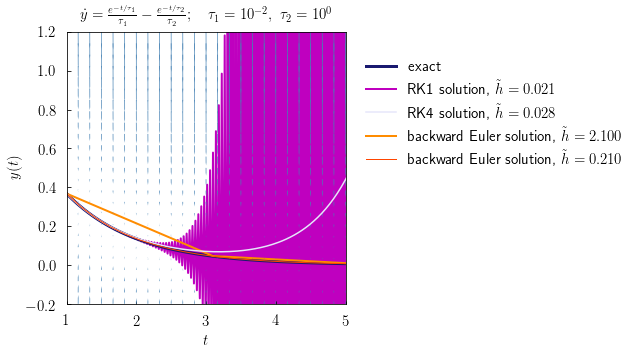

In [15]:
import numpy as np
from scipy.special import lambertw

# set up y'= y^2 - y^3
def fq(x, y, dx, *args):    
    return  dx * f(x, y, *args) 

def f(x, y, t1, t2):    
    #return  np.exp(-x/t1)/t1 - np.exp(-x/t2)/t2
    return  (np.exp(-x/t2) - y)/t1 - np.exp(-x/t2)/t2

def ysolution(x, t1, t2):
    """exact solution"""
    return np.exp(-x/t2) - np.exp(-x/t1)

t1 = 1.e-2; t2 = 1.
args =[t1, t2]

# parameters of the quiver grid and the function range
Ng = 25
xmin, xmax = 1., 5.; 
dx = np.abs(xmax-xmin)/ Ng

ymin = -.2; ymax = 1.2
#ymin = 0.99; ymax = 1.01
yscale = 200.5*(ymax-ymin)**0.75

# evenly spaced grids of x and y 
x = np.linspace(xmin, xmax, Ng)
y = np.linspace(ymin, ymax, Ng)

# generated 2d mesh using numpy's meshgrid
(X,Y) = np.meshgrid(x,y)

# parameters for quivers indicating local slope
u = dx * np.ones_like(X); v = fq(X, Y, dx, *args)

# few steps of 1st order Euler scheme
step1 = 0.021; step4 = 1.34*step1
step1b = 100.*step1; step1b2 = 10*step1

xout1, yout1 = rk1(f, ysolution(xmin, *args), xmin, xmax, step1, *args)
xout4, yout4 = rk4(f, ysolution(xmin, *args), xmin, xmax, step4, *args)
xout1b, yout1b = back_euler(f, ysolution(xmin, *args), xmin, xmax, step1b, 1.e-8, *args)
xout1b2, yout1b2 = back_euler(f, ysolution(xmin, *args), xmin, xmax, step1b2, 1.e-8, *args)

# vector of x for plotting the function itself
xp = np.linspace(xmin, xmax, 100) 
yp = ysolution(xp, *args)
# plot
plt.figure(figsize=(fsize,fsize))
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.plot(xp, yp, lw = 3., c='midnightblue', zorder=1, label=r'exact')
plt.plot(xout1, yout1, lw = 2., c='m', zorder=0, label=r'RK1 solution, $\tilde{h}=%.3f$'%(step1))
plt.plot(xout4, yout4, c='lavender', zorder=2, label=r'RK4 solution, $\tilde{h}=%.3f$'%(step4))
plt.plot(xout1b, yout1b, lw = 2., c='darkorange', zorder=1, label=r'backward Euler solution, $\tilde{h}=%.3f$'%(step1b))
plt.plot(xout1b2, yout1b2, lw = 1., c='orangered', zorder=2, label=r'backward Euler solution, $\tilde{h}=%.3f$'%(step1b2))
plt.quiver(X, Y, u, v, angles='xy', headlength=0, headwidth=0, scale=yscale, color='steelblue', zorder=2)

plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend(frameon=False, bbox_to_anchor=(1.025,0.95), fontsize=fontsize)
plt.title(r'$\dot{y} = \frac{e^{-t/\tau_1}}{\tau_1}-\frac{e^{-t/\tau_2}}{\tau_2};\ \ \ \tau_1=10^{%d},\ \tau_2=10^{%d}$'%(np.log10(t1),np.log10(t2)), 
          fontsize=fontsize)
#plt.savefig('fig/ODE_slope_RK141b_stiff3.png', bbox_inches='tight')
#plt.savefig('fig/ODE_slope_RK141b_stiff3.pdf', bbox_inches='tight')

plt.show()

### Stiff equation example

Equation determining a burning process in a spherical ''flame'' of radius $r(t)$, in which new burning material can only come through the surface of the flame:  
$$\frac{dr}{dt} = r^2 - r^3;\ \ \  r(t_0)=r_0.$$

$$r_0 = 0.01$$

<img width=500 src="img/ODE_slope_RK1_stiff5.png"></img>

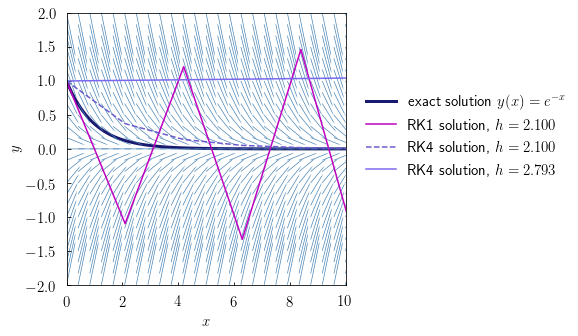

In [17]:
# set up y'=f(x), where y = e^(c*x)
def fq(x, y, dx, c):    
    return  dx * c * y 

def f(x, y, c):    
    return  c * y 

def ysolution(x, c):
    return np.exp(c*x) 

c = -1.

# parameters of the quiver grid and the function range
Ng = 25
xmin, xmax = 0., 10.; 
dx = np.abs(xmax-xmin)/ Ng

ymin = np.minimum(1.2*ysolution(xmin,c), 1.2*ysolution(xmax,c));
ymax = np.maximum(1.2*ysolution(xmin,c), 1.2*ysolution(xmax,c));
ymin = -2.; ymax = 2.
yscale = 2.*(ymax-ymin)**0.75

# evenly spaced grids of x and y 
x = np.linspace(xmin, xmax, Ng)
y = np.linspace(ymin, ymax, Ng)

# generated 2d mesh using numpy's meshgrid
(X,Y) = np.meshgrid(x,y)

# parameters for quivers indicating local slope
u = dx * np.ones_like(X); v = fq(X, Y, dx, c)

# few steps of 1st order Euler scheme
step1 = 2.1; step4 = step1 * 1.33
args = [c]
xout1, yout1 = rk1(f, ysolution(xmin,c), xmin, xmax, step1, *args)
xout4, yout4 = rk4(f, ysolution(xmin,c), xmin, xmax, step1, *args)
xout41, yout41 = rk4(f, ysolution(xmin,c), xmin, xmax, step4, *args)

# vector of x for plotting the function itself
xp = np.linspace(xmin, xmax, 100)

# plot
plt.figure(figsize=(fsize,fsize))
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.plot(xp, ysolution(xp,c), lw=3, c='midnightblue', zorder=0, label=r'exact solution $y(x)=e^{-x}$')#, label=r'$y(x)=e^{%.2fx}$'%c)
plt.plot(xout1, yout1, c='m', zorder=2, label=r'RK1 solution, $h=%.3f$'%step1)
plt.plot(xout4, yout4, '--', c='slateblue', zorder=2, label=r'RK4 solution, $h=%.3f$'%step1)
plt.plot(xout41, yout41, c='mediumslateblue', zorder=2, label=r'RK4 solution, $h=%.3f$'%step4)
plt.quiver(X, Y, u, v, angles='xy', headlength=0, headwidth=0, scale=yscale, color='steelblue', zorder=1)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(frameon=False, bbox_to_anchor=(1.025,0.75), fontsize=fontsize)

#plt.savefig('fig/ODE_slope_RK14_h2_1.png', bbox_inches='tight')
#plt.savefig('fig/ODE_slope_RK14_h2_1.pdf', bbox_inches='tight')

plt.show()

### Stiff equation example

Equation determining a burning process in a spherical ''flame'' of radius $r(t)$, in which new burning material can only come through the surface of the flame:  
$$\frac{dr}{dt} = r^2 - r^3;\ \ \  r(t_0)=r_0.$$

$$r_0 = 0.01$$

<img width=500 src="img/ODE_slope_RK1_stiff1.png"></img>

### Stiff equation example

Equation determining a burning process in a spherical ''flame'' of radius $r(t)$, in which new burning material can only come through the surface of the flame:  
$$\frac{dr}{dt} = r^2 - r^3;\ \ \  r(t_0)=r_0.$$

$$r_0 = 0.01$$

<img width=500 src="img/ODE_slope_RK1_stiff2.png"></img>

### Stiff equation example

Equation determining a burning process in a spherical ''flame'' of radius $r(t)$, in which new burning material can only come through the surface of the flame:  
$$\frac{dr}{dt} = r^2 - r^3;\ \ \  r(t_0)=r_0.$$

$$r_0 = 0.01$$

<img width=500 src="img/ODE_slope_RK1_stiff3.png"></img>

C:\Users\h2_sf\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


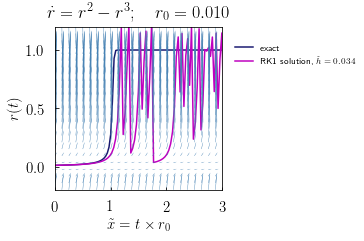

In [10]:
import numpy as np
from scipy.special import lambertw

# set up y'= y^2 - y^3
def fq(x, y, dx, c):    
    return  dx * f(x, y, c) * c

def f(x, y, c):    
    #print c * (y**2 - y**3)
    return  (y**2 - y**3)

def ysolution(x, y0):
    """exact solution"""
    a = 1./y0 - 1.
    return 1/(lambertw(a*np.exp(a-x)) + 1.)

delta = 0.01; c = 1./delta

# parameters of the quiver grid and the function range
Ng = 25
xmin, xmax = 0., 3.; 
dx = np.abs(xmax-xmin)/ Ng

ymin = -.2; ymax = 1.2
#ymin = 0.99; ymax = 1.01
yscale = 5.5*(ymax-ymin)**0.25

# evenly spaced grids of x and y 
x = np.linspace(xmin, xmax, Ng)
y = np.linspace(ymin, ymax, Ng)

# generated 2d mesh using numpy's meshgrid
(X,Y) = np.meshgrid(x,y)

# parameters for quivers indicating local slope
u = dx * np.ones_like(X); v = fq(X, Y, dx, c)

# few steps of 1st order Euler scheme
step = 0.034 * c 
args =[c]
xout, yout = rk1(f, delta, xmin * c, xmax * c, step, *args)
xout = np.array(xout) / c
# vector of x for plotting the function itself
xp = np.linspace(xmin, xmax, 100) * c
yp = ysolution(xp,delta)
# plot
plt.figure(figsize=(fsize,fsize))
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.plot(xp/c, yp, c='midnightblue', zorder=0, label=r'exact')
plt.plot(xout, yout, c='m', zorder=0, label=r'RK1 solution, $\tilde{h}=%.3f$'%(step*delta))
plt.quiver(X, Y, u, v, angles='xy', headlength=0, headwidth=0, scale=yscale, color='steelblue', zorder=1)

plt.xlabel(r'$\tilde{x}=t\times r_0$')
plt.ylabel(r'$r(t)$')
plt.legend(frameon=False, bbox_to_anchor=(1.025,0.95), fontsize=9)
plt.title(r'$\dot{r}= r^2-r^3;\ \ \ r_0=%.3f$'%delta)
#plt.savefig('fig/ODE_slope_RK1_stiff5.png', bbox_inches='tight')
#plt.savefig('fig/ODE_slope_RK1_stiff5.pdf', bbox_inches='tight')

plt.show()